# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [449]:
df = pd.read_excel('/content/personality.xlsx')

In [450]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Mark,1,1,1,3409,0
1,James,1,1,1,3210,1
2,Aaron,1,1,1,2607,1
3,Teej,0,1,0,1010,0
4,Rem,0,1,0,1212,0


1. Display the summary of all the features of the dataset using `.info()`

In [451]:
df.drop(columns='Name', inplace=True)

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       60 non-null     int64
 1   Active in social media?      60 non-null     int64
 2   Replies to comments?         60 non-null     int64
 3   Number of friends/followers  60 non-null     int64
 4   Personality                  60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


2. Display the total number of samples from each label using `.value_counts()`

In [453]:
df["Personality"].value_counts()

,count
Personality,
1,36
0,24


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [454]:
# put your answer here
X = df.drop(columns=['Personality']).values



4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [455]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [456]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 4)
(42,)
(18, 4)
(18,)


In [457]:
print(X_train)

[[   0    1    0 1675]
 [   0    1    1 2098]
 [   0    1    0 1212]
 [   1    1    1 2269]
 [   1    1    1 3409]
 [   0    1    0 1193]
 [   0    1    0 1574]
 [   1    1    1 2273]
 [   0    1    0 1397]
 [   1    1    1 2122]
 [   1    1    1 3523]
 [   0    1    0 1563]
 [   1    1    1 2056]
 [   1    1    1 2512]
 [   0    1    0 1890]
 [   1    1    1 2224]
 [   1    1    1 3154]
 [   1    1    1 2170]
 [   0    1    0 1564]
 [   1    1    1 3210]
 [   0    1    1 2630]
 [   1    1    1 2110]
 [   0    1    0 1736]
 [   0    1    0 1680]
 [   0    1    0 2000]
 [   1    1    1 2262]
 [   1    1    1 2555]
 [   0    1    0 1174]
 [   0    1    0 1457]
 [   1    1    1 2987]
 [   1    1    1 2145]
 [   1    1    1 2520]
 [   0    1    0 1229]
 [   1    1    1 2248]
 [   1    1    1 2454]
 [   0    1    0 1837]
 [   1    1    1 2007]
 [   0    1    0 1345]
 [   1    1    1 2225]
 [   0    1    0 1840]
 [   1    1    1 2720]
 [   1    1    1 2011]]


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

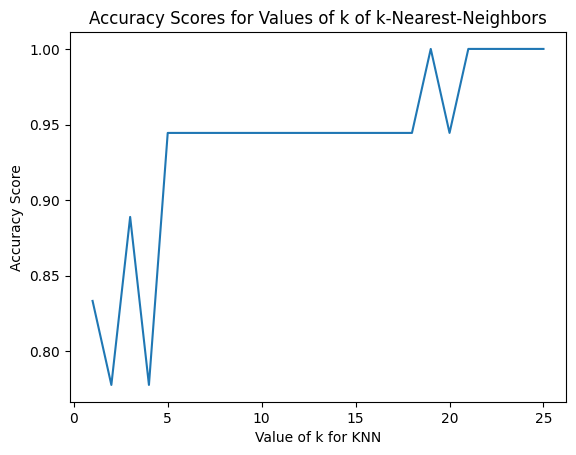

In [458]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [459]:
knn = KNeighborsClassifier(n_neighbors=5)

7. Train the model using the `.fit()`

In [460]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

8. Test the model using the `.predict()`

In [468]:
knn.predict([[0,1,0,1000]])

array([0])

## Evaluate the model

9. Create a confusion matrix

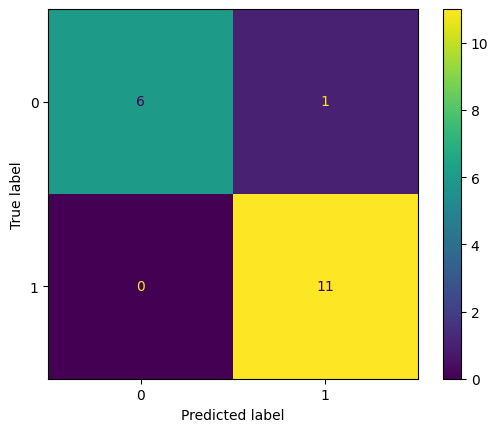

In [462]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [463]:
metrics.accuracy_score(y_test, y_pred)

0.9444444444444444

11. Display the precision

In [464]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.85714286 1.        ]


12. Display the recall

In [465]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.         0.91666667]


13. Display the f1-score

In [466]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.92307692 0.95652174]


array([0])